In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns

In [101]:
df = pd.read_csv('./Resources/twitter_replies_data.csv')

In [92]:
df.columns

Index(['Unnamed: 0', 'screen_name', 'followers', 'following', 'verified',
       'tweet_count', 'default_prof_img', 'user_mentions', 'linked_urls',
       'has_#', 'time_to_respond_minutes', 'account_age_days',
       'follwers_to_following_ratio', 'avg_tweets_per_day', 'clean_text',
       'is_bot?'],
      dtype='object')

In [102]:
cols = ['user_mentions','linked_urls','has_#']

In [103]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


In [104]:
df.describe()

,followers,following,tweet_count,user_mentions,linked_urls,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,is_bot?
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,6233.678218,690.034653,6422.123762,1.237624,0.054455,93.128713,1732.000000,11.974455,12.116634,0.207921
std,29563.316244,882.130401,11532.244782,0.530625,0.227478,543.264788,1565.010794,77.472044,34.903065,0.406828
min,0.000000,0.000000,4.000000,0.000000,0.000000,-13.000000,3.000000,0.000000,0.010000,0.000000
25%,74.750000,152.000000,754.500000,1.000000,0.000000,1.000000,517.250000,0.240000,0.702500,0.000000
50%,190.500000,301.000000,2143.000000,1.000000,0.000000,3.000000,1051.000000,0.675000,2.315000,0.000000
75%,893.000000,975.500000,6184.750000,1.000000,0.000000,7.000000,3095.000000,1.960000,9.480000,0.000000
max,289250.000000,4990.000000,88975.000000,3.000000,1.000000,5209.000000,5513.000000,1014.910000,389.000000,1.000000


In [105]:
df['is_bot?'].value_counts()

0    160
1     42
Name: is_bot?, dtype: int64

In [106]:
len(df)

202

In [107]:
df = df.fillna('picture')
len(df)

202

In [108]:
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


Count plot for ' user_mentions ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


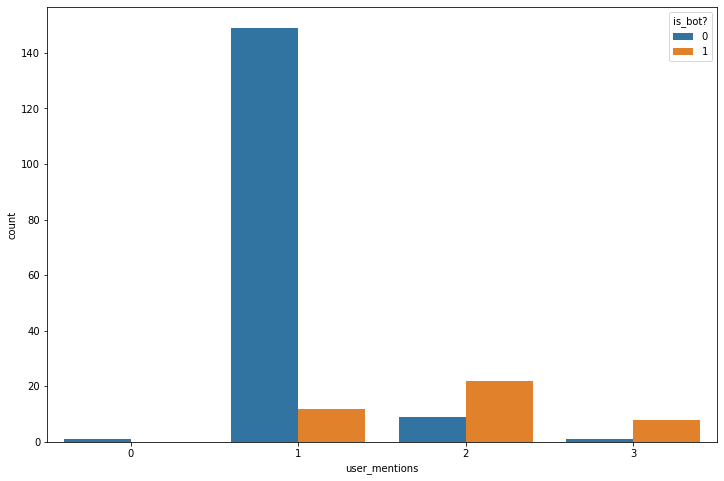

Count plot for ' linked_urls ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


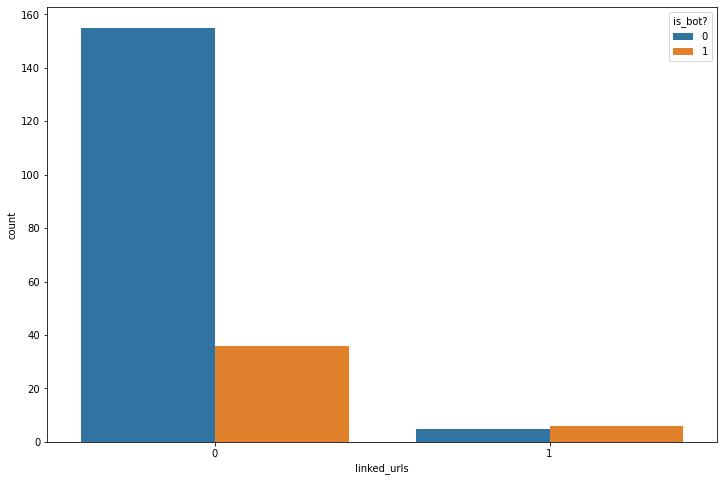

Count plot for ' has_# ' feature, based on Spam/ Ham tweet label


c:\Users\Justin\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


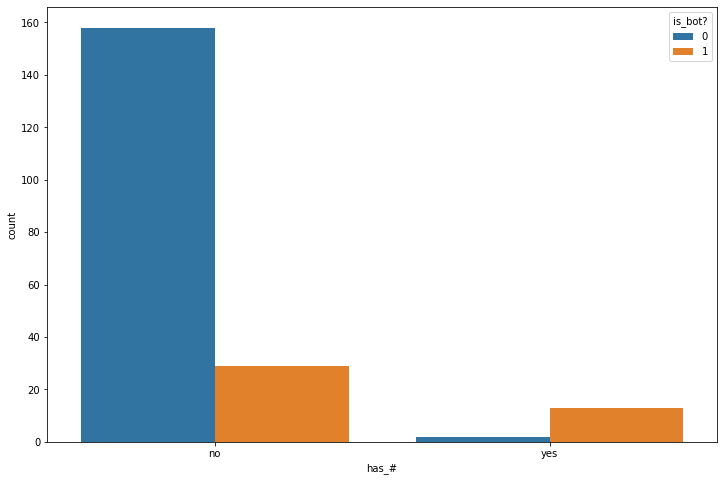

In [109]:
for i in range(0,len(cols)):
    plt.figure(figsize=(12,8))
    c = cols[i]
    print("Count plot for","'",cols[i],"' feature, based on Spam/ Ham tweet label")
    sns.countplot(c, hue=df['is_bot?'],data =df)
    plt.show()

In [110]:
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


In [111]:
X = df.drop(columns=['screen_name','clean_text','is_bot?'])
X.head()

,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day
0,462,73,False,545,False,1,0,no,100,1152,6.33,0.47
1,171,87,False,848,False,1,0,no,76,50,1.97,16.96
2,131,296,False,862,False,1,0,no,60,2448,0.44,0.35
3,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59
4,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66


In [112]:
y = df['is_bot?']

In [113]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_bot?, dtype: int64

In [114]:
len(X), len(y)

(202, 202)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42,shuffle=True)

In [116]:
len(X_train), len(X_test), len(y_train), len(y_test)

(161, 41, 161, 41)

In [117]:
y_test.value_counts()

0    33
1     8
Name: is_bot?, dtype: int64

* Numerical Columns for Standardization:
    * followers
    * following
    * tweet_count
    * time_to_respond_minutes
    * aaacount_age_days
    * followers_to_following_ratio
    * avg_tweets_per_day
* Categorical Columns that need encoding
    * verfied
    * default_prof_img
    * has_#

In [118]:
ct = make_column_transformer(
    (MinMaxScaler(), ['followers','following','tweet_count','time_to_respond_minutes',
                      'account_age_days','follwers_to_following_ratio','avg_tweets_per_day']),
    (OneHotEncoder(handle_unknown='ignore'),['verified','default_prof_img','has_#'])
)

In [119]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)

X_test_normal = ct.transform(X_test)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_normal,y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test_normal)

accuracy_score(y_test,y_pred)

0.8536585365853658

In [123]:
tree_clf.score(X_test_normal,y_test)

0.8536585365853658

In [124]:
depth=[]
training_score=[]
testing_score = []


for i in range(1,25):
    clf_dt= DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    clf_dt.fit(X_train_normal,y_train)    
    pred_train = clf_dt.predict(X_train_normal)
    pred_test = clf_dt.predict(X_test_normal)

    depth.append(i)
    training_score.append(accuracy_score(y_train,pred_train))
    testing_score.append(accuracy_score(y_test,pred_test))

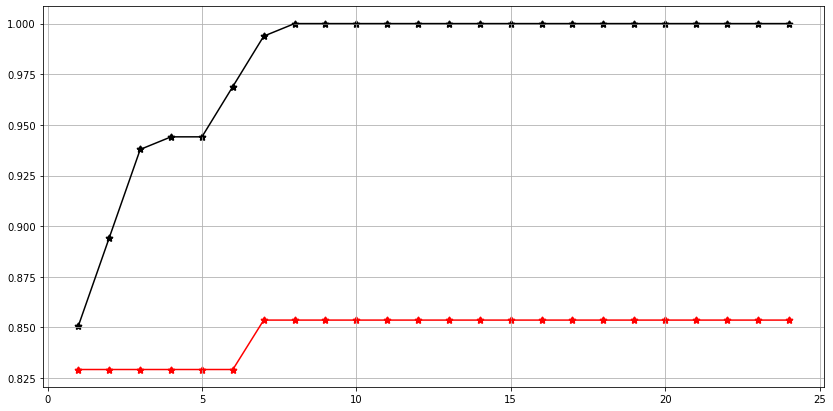

In [125]:
plt.figure(figsize=(14,7))
plt.grid()

plt.plot(depth, training_score,c='black')
plt.plot(depth, testing_score,c='red')
plt.scatter(depth, training_score,c='black',marker='*',linewidth=2)
plt.scatter(depth, testing_score,c='red',marker='*',linewidth=2)

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ['gini','entropy'],
    'max_depth': list(np.arange(1,50,1))
}
clf = DecisionTreeClassifier()
clf_grid = GridSearchCV(estimator=clf, param_grid=param_grid,cv=5)

clf_grid.fit(X_train_normal,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [127]:
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [128]:
clf_dt = DecisionTreeClassifier(criterion=clf_grid.best_params_['criterion'],max_depth=clf_grid.best_params_['max_depth'],random_state=42)
clf_dt.fit(X_train_normal,y_train)
clf_dt.score(X_test_normal,y_test)

0.8292682926829268

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()

gbc_clf.fit(X_train_normal,y_train)

gbc_clf.score(X_test_normal,y_test)

0.9024390243902439

In [141]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('gbc', GradientBoostingClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator= RandomForestClassifier(random_state=42),cv=8
)

stacking_clf.fit(X_train_normal,y_train)

stacking_clf.score(X_test_normal,y_test)

0.8780487804878049

Looking like were topping out at around 90% accuracy using typical machine learning models and ensemble learning
Now I would like to use NLP on the text portion, see what our accuracy can be, and use the text processing in accordance with our ensemble to create an even stronger ensemble (Hopefully)

In [131]:
df.head()

,screen_name,followers,following,verified,tweet_count,default_prof_img,user_mentions,linked_urls,has_#,time_to_respond_minutes,account_age_days,follwers_to_following_ratio,avg_tweets_per_day,clean_text,is_bot?
0,itsjohnnytrades,462,73,False,545,False,1,0,no,100,1152,6.33,0.47,big crypto accounts starting to look for bear...,0
1,aicryptotrade1,171,87,False,848,False,1,0,no,76,50,1.97,16.96,first 28 2k then 29k then 32k this is the roa...,0
2,___reivax___,131,296,False,862,False,1,0,no,60,2448,0.44,0.35,this looks like a beautiful bob ross painting,0
3,Horstvault,2782,63,False,3748,False,1,0,no,53,816,44.16,4.59,his do you get a chart that shows you the rea...,0
4,keshvism,142,1855,False,874,False,1,0,no,49,1324,0.08,0.66,forget price action for 2 mins this chart in...,0


In [132]:
df_text = df['clean_text']

In [142]:
len(df_text)

202

In [133]:
y

0      0
1      0
2      0
3      0
4      0
      ..
197    0
198    1
199    0
200    1
201    1
Name: is_bot?, Length: 202, dtype: int64

In [143]:
X_train,X_test,y_train,y_test = train_test_split(df_text,y,test_size=.2,random_state=42)

In [148]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [150]:
# Avg number of words in training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

12

In [151]:
max_vocab_length= 300
max_length= 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,output_mode='int', output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

In [153]:
import random

# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 gm johnny  positivity received           

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 47, 161,   1, 152,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [154]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 words: {top_5_words}")
print(f"Bottom 5 words: {bottom_5_words}")

Number of words in vocab: 300
Top 5 words: ['', '[UNK]', 'to', 'the', 'i']
Bottom 5 words: ['verify', 've', 'van', 'using', 'use']


In [157]:
tf.random.set_seed(42)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim =128,
                             input_length=max_length,
                             name = 'embedding_1')

embedding

In [158]:
# Get a random sentence from training set
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 elon is something to plan with dodge   big things are coming      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0258246 ,  0.01352644,  0.00442461, ...,  0.00794672,
         -0.04759842, -0.04997262],
        [ 0.04891661,  0.0368566 ,  0.00303916, ...,  0.00793499,
          0.03340656,  0.03416153],
        [ 0.00999719,  0.03338546, -0.04534726, ..., -0.03066843,
         -0.00719974, -0.04758834],
        ...,
        [-0.04543213, -0.02375405, -0.04684446, ..., -0.02164778,
          0.02457779,  0.01708395],
        [-0.04543213, -0.02375405, -0.04684446, ..., -0.02164778,
          0.02457779,  0.01708395],
        [-0.04543213, -0.02375405, -0.04684446, ..., -0.02164778,
          0.02457779,  0.01708395]]], dtype=float32)>

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [160]:
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

model_0.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [161]:
model_0.score(X_test,y_test)

0.8292682926829268

In [162]:
baseline_score = model_0.score(X_test,y_test)

In [163]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [165]:
baseline_preds = model_0.predict(X_test)

In [167]:
baseline_results = calculate_results(y_true =y_test, y_pred=baseline_preds)
baseline_results

{'accuracy': 82.92682926829268,
 'precision': 0.8591463414634145,
 'recall': 0.8292682926829268,
 'f1': 0.771058395515462}

In [168]:
inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs,outputs, name='model_1')

In [170]:
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1_history = model_1.fit(X_train,y_train, epochs= 50, validation_data=(X_test,y_test))

Epoch 1/50
6/6 [==============================] - 1s 27ms/step - loss: 0.5251 - accuracy: 0.8882 - val_loss: 0.5420 - val_accuracy: 0.8049
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.8882 - val_loss: 0.5207 - val_accuracy: 0.8049
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8882 - val_loss: 0.5017 - val_accuracy: 0.8049
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4414 - accuracy: 0.8882 - val_loss: 0.4841 - val_accuracy: 0.8049
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4161 - accuracy: 0.8882 - val_loss: 0.4681 - val_accuracy: 0.8049
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.8882 - val_loss: 0.4538 - val_accuracy: 0.8049
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3690 - accuracy: 0.8882 - val_loss: 0.4415 - val_accuracy: 0.8049
Epoch 8/50
6/6 [=================

In [171]:
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8537


[0.2959907352924347, 0.8536585569381714]

In [172]:
model_1_pred_probs = model_1.predict(X_test)
model_1_preds = tf.round(model_1_pred_probs)

2/2 [==============================] - 0s 2ms/step


In [174]:
model_1_preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [176]:
model_1_results = calculate_results(y_true=y_test, y_pred=model_1_preds)
model_1_results

{'accuracy': 85.36585365853658,
 'precision': 0.8424522083058669,
 'recall': 0.8536585365853658,
 'f1': 0.8334494773519163}

In [183]:
tf.random.set_seed(42)

model_2_embedding = layers.Embedding(input_dim=max_vocab_length,output_dim=128,
                                     input_length=max_length,name='embedding_2')

inputs = layers.Input(shape=(1,),dtype='string')
x= text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_2= tf.keras.Model(inputs,outputs,name ='model_2_LSTM')

(None, 15, 128)
(None, 64)


In [184]:
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2_history = model_2.fit(X_train,y_train, epochs = 25, validation_data=(X_test,y_test))

Epoch 1/25
6/6 [==============================] - 2s 66ms/step - loss: 0.6505 - accuracy: 0.7888 - val_loss: 0.5937 - val_accuracy: 0.8049
Epoch 2/25
6/6 [==============================] - 0s 8ms/step - loss: 0.5286 - accuracy: 0.7888 - val_loss: 0.4658 - val_accuracy: 0.8049
Epoch 3/25
6/6 [==============================] - 0s 8ms/step - loss: 0.3763 - accuracy: 0.7888 - val_loss: 0.4039 - val_accuracy: 0.8049
Epoch 4/25
6/6 [==============================] - 0s 7ms/step - loss: 0.3099 - accuracy: 0.8199 - val_loss: 0.5140 - val_accuracy: 0.8049
Epoch 5/25
6/6 [==============================] - 0s 8ms/step - loss: 0.2911 - accuracy: 0.8634 - val_loss: 0.4257 - val_accuracy: 0.8049
Epoch 6/25
6/6 [==============================] - 0s 8ms/step - loss: 0.2102 - accuracy: 0.8944 - val_loss: 0.3347 - val_accuracy: 0.8293
Epoch 7/25
6/6 [==============================] - 0s 7ms/step - loss: 0.1480 - accuracy: 0.9565 - val_loss: 0.3050 - val_accuracy: 0.8780
Epoch 8/25
6/6 [=================

In [185]:
model_2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5768 - accuracy: 0.9024


[0.5768389105796814, 0.9024389982223511]

In [187]:
model_2_pred_probs = model_2.predict(X_test)
model_2_preds = tf.round(model_2_pred_probs)

model_2_results = calculate_results(y_true=y_test, y_pred= model_2_preds)
model_2_results

2/2 [==============================] - 0s 3ms/step


{'accuracy': 90.2439024390244,
 'precision': 0.8984901277584204,
 'recall': 0.9024390243902439,
 'f1': 0.8969051035048167}